# EE5377 - Introduction to Image Processing

Homework-0

## Imports

### Importing Libraries

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as pimg
import os

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### Images

Images used in thsi Assignment aare GrayScale. Images are downloaded from University of Southern California’s image database at http://sipi.usc.edu/database/database.php?volume=misc.

## Q1

### Reading Image

In [2]:
img1 = pimg.imread('Images/house.tiff')

## Q2

1. Understanding and Plotting Bit-Planes of Images.
2. Understanding and Implementation of Quantisation of Image.

### Reading and Displaying the Image

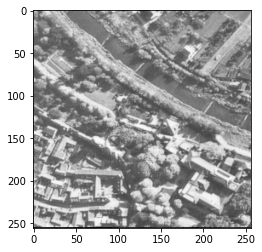

In [93]:
img2 = pimg.imread('Images/5.1.10.tiff')
plt.imshow(img2,cmap='gray')
plt.show()

### Maximum and Minimum values of Pixels

In [5]:
print('Maximum Pixel Value ',np.max(img2))
print('Minimum Pixel Value ',np.min(img2))
print('No.of bits needed ', int(1 + np.log2(np.max(img2))))

Maximum Pixel Value  248
Minimum Pixel Value  1
No.of bits needed  8


### Resolution of Image

In [6]:
print ("Resolution:", np.shape(img2))

Resolution: (256, 256)


### Size of Compressed Image

In [7]:
8*os.stat('Images/5.1.10.tiff').st_size

525360

### Expected Size of Image

In [8]:
print ("Expected Size of Image", img2.shape[0] * img2.shape[1] * int(1 + np.log2(np.max(img2))))

Expected Size of Image 524288


### Image to Bitplane and Bitplane to Image Conversions

In [98]:
def Image2Bit(img):
    return np.reshape(np.unpackbits(np.reshape(img,(-1,1)),axis=1),(256,256,-1))

def Bit2Image(imgbit):
    return np.reshape(np.packbits(np.reshape(imgbit,(-1,8))),(256,256))

img2bitplanes = Image2Bit(img2)

### Plotting Bitplanes

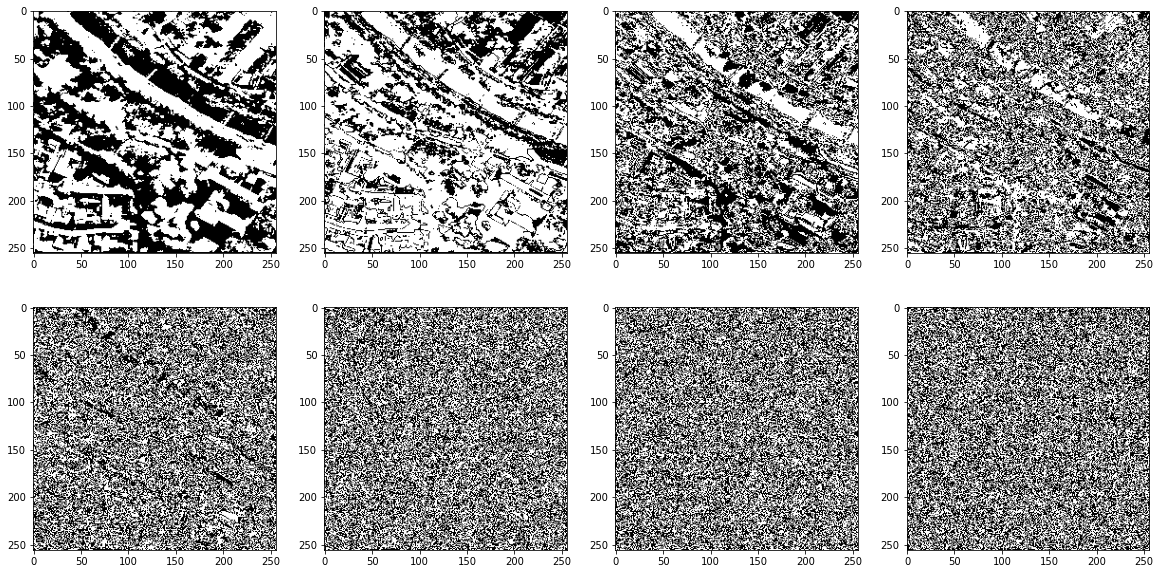

In [99]:
plt.figure(figsize=(20,10))
for i in range(img2bitplanes.shape[2]):
    plt.subplot(2,4,i+1)
    plt.imshow(img2bitplanes[:,:,i],cmap='gray')
plt.show()

### Importance of Each Bit Plane

Starting with the lowest bitplane, set each bitplane to 0 and display the resulting gray scale image (you will ultimately display a black image).

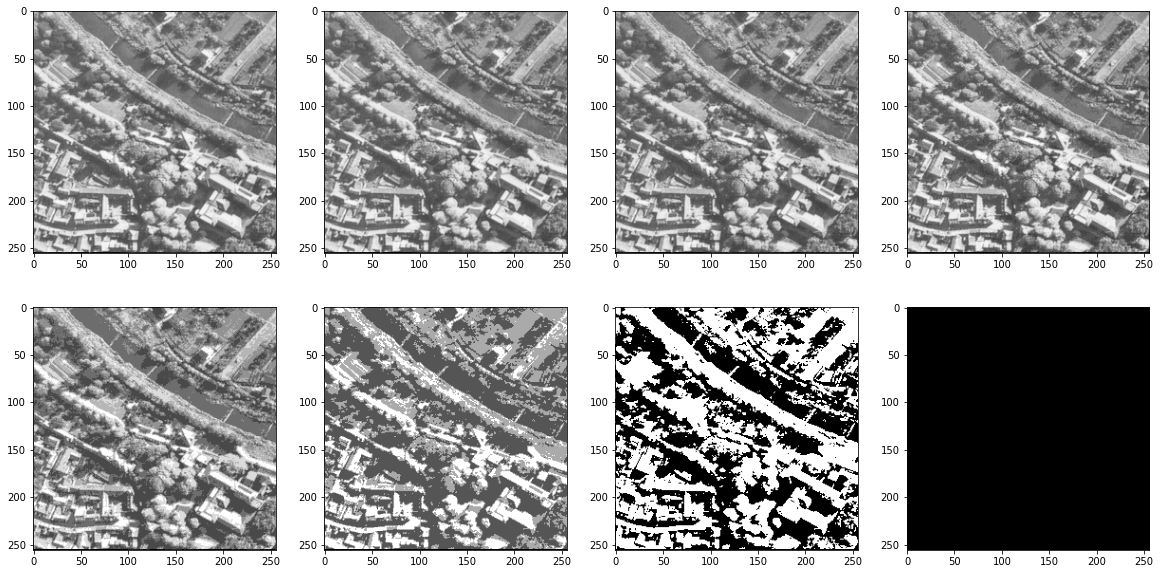

In [100]:
def ImpImage(imgbit):
    ib = imgbit
    plt.figure(figsize=(20,10))
    b = img2bitplanes.shape[2]
    for i in range(b):
        ib[:,:,b-1-i] = np.zeros((256,256))
        plt.subplot(2,4,i+1)
        plt.imshow(Bit2Image(ib),cmap='gray')
    plt.show()
    
ImpImage(img2bitplanes)

### Re-Quantize Image

Re-Quantizing Images depending on No.of Quantisation Levels or No.of Bits used to represent each Pixel of Image

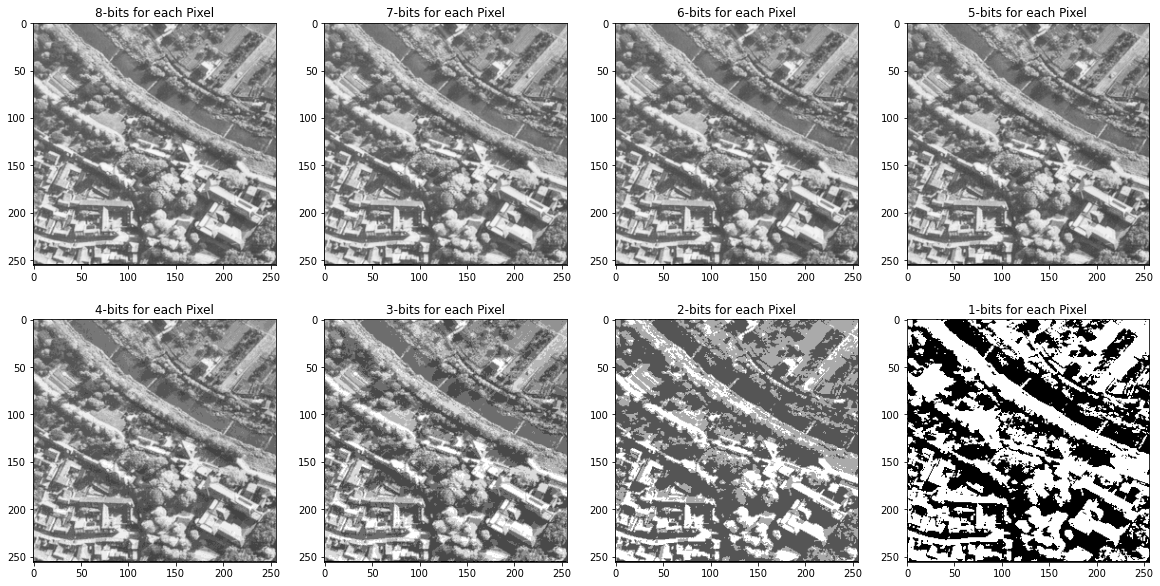

In [111]:
def QuantizeImage(img,bits):
    factor = pow(2,bits-1)
    return factor * np.floor(img/factor)

plt.figure(figsize=(20,10))
for i in range(1,9):
    plt.subplot(2,4,i)
    plt.title(str(9-i) + "-bits for each Pixel")
    plt.imshow(QuantizeImage(img2,i),cmap='gray')
plt.show()

## Q3

1. Plotting Histogram of Image and using it to Quantise Image Pizels into 2 levels.
2. Implementing Connected Component Algorithm
3. Removal of Minor Blobs in Images
4. Implementation fo functions like DILATE, ERODE, MEDIAN, OPEN, CLOSE, OPEN-CLOS and CLOS-OPEN

### Reading and Displaying Image

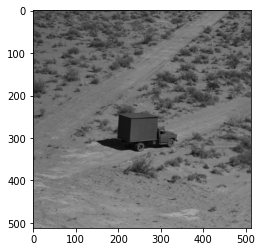

In [82]:
img3 = pimg.imread('Images/7.1.01.tiff')
plt.imshow(img3,cmap='gray')
plt.show()

### Generating Histogram of Image which represents the Frequency of each Pixel Value

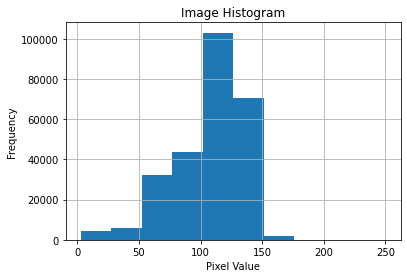

In [92]:
def ImageHistogram(img):
    plt.title('Image Histogram')
    plt.hist(img.flatten())
    plt.grid()
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

ImageHistogram(img3)

### Frequency of each Pixel Value.

In [85]:
Freq = np.bincount(img3.flatten())

### Setting Threshold to Quantise Image to 2 Levels
Threshold is adjusted as $\frac{\text{2MaxFreqPixel}}{3}$

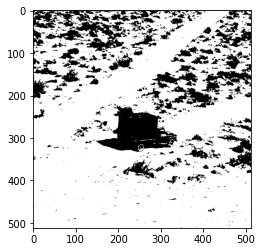

In [90]:
MaxFreqPixel = np.argmax(Freq)
binimage = np.where(img3 < MaxFreqPixel/1.5, 0, 255)/255
plt.imshow(binimage,cmap='gray')
plt.show()

### Connected Component Algorithm

Any set of pixels which is not separated by a boundary is call connected. Each maximal region of connected pixels is called a **Connected-Component**. Connected-Component labeling, Connected-Component analysis, blob extraction, region labeling, blob discovery, or region extraction is an algorithmic application of graph theory, where subsets of connected components are uniquely labeled based on a given heuristic

In [87]:
def CCA(I):
    R = np.zeros(I.shape)
    k = 1
    for i in range(1,I.shape[0]):
        for j in range(1,I.shape[1]):
            if (I[i][j] == 0 and I[i-1][j] == 1 and I[i][j-1] == 1):
                R[i][j] = k
                k += 1
            elif (I[i][j] == 0 and I[i-1][j] == 0 and I[i][j-1] == 1):
                R[i][j] = R[i-1][j]
            elif (I[i][j] == 0 and I[i-1][j] == 1 and I[i][j-1] == 0):
                R[i][j] = R[i][j-1]
            elif (I[i][j]==0 and I[i-1][j] == 0 and I[i][j-1] == 0):
                R[i][j] = min(R[i][j-1], R[i-1][j])
                if R[i][j-1] != R[i-1][j-1]:
                    R[i][j-1] = R[i][j]
                    R[i-1][j] = R[i][j]
            
    return R.astype(int)

### Blobs of Image

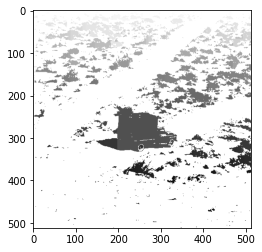

In [88]:
CCAimg = CCA(binimage)
plt.imshow(CCAimg,cmap='gray_r')

### Major Blob

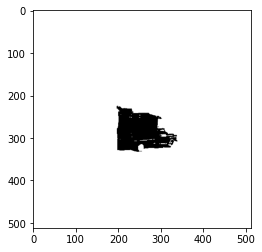

In [89]:
CCA = np.where(CCAimg == 1+np.argmax(np.bincount(CCAimg.flatten())[1:]), 0, 1)
plt.imshow(CCA,cmap = 'gray')